In [1]:
'''
We are learning how to use LSTM to do forecasting. Follow the code and explain it when it is needed.
'''

'\nWe are learning how to use LSTM to do forecasting. Follow the code and explain it when it is needed.\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

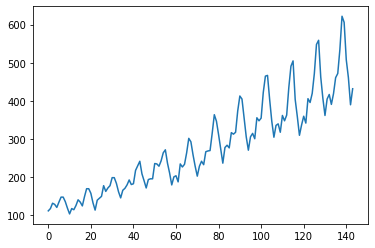

In [3]:
#load the dataset

training_set = pd.read_csv('airline-passengers.csv')

training_set = training_set.iloc[:,1:2].values

plt.plot(training_set, label = 'Airlines Data')
plt.show()

In [4]:
'''
***Explain*** What is the sliding_windows function doing here?, and what does the seq_length value mean?

We want the lstm network to work on this time series data. the sliding windowns function is there to break up the data into partitions of
sequence length. In this case that is groups of 5. The sliding windows doesn't just make like a normal batch, it advances the index by 1
each time in order to capture a "sliding window" of the data.
'''

seq_length = 10

def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)



sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Model

In [5]:
'''
LSTM Network
'''

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        '''
        ***Explain*** Why do we need h_0 and c_0?

        the c_0 creates a tensor wrapper that can store the cell state. This is what the lstm can add to, in order to store information.
        Similarly h_0 is a variable that can store another output state. Both of these are fed and changed information through gates.
        '''
        
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

## Training

In [6]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

'''
***Explain*** Why are the input size and the num_classes equal to one?, should not it be input_size = seq_length? 

The input size being 1 takes one of the sliding windows at a time, which is a group of 5. The num classes being one also classifies the
sliding windows one at a time, this is because the output is just a numerical of how many passengers will be forcasted.
'''

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

# for np in lstm.parameters():
#     print(np)

In [7]:


criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.06121
Epoch: 100, loss: 0.00346
Epoch: 200, loss: 0.00286
Epoch: 300, loss: 0.00232
Epoch: 400, loss: 0.00201
Epoch: 500, loss: 0.00188
Epoch: 600, loss: 0.00182
Epoch: 700, loss: 0.00178
Epoch: 800, loss: 0.00172
Epoch: 900, loss: 0.00168
Epoch: 1000, loss: 0.00165
Epoch: 1100, loss: 0.00162
Epoch: 1200, loss: 0.00160
Epoch: 1300, loss: 0.00157
Epoch: 1400, loss: 0.00153
Epoch: 1500, loss: 0.00150
Epoch: 1600, loss: 0.00146
Epoch: 1700, loss: 0.00138
Epoch: 1800, loss: 0.00135
Epoch: 1900, loss: 0.00134


## Testing for Airplane Passengers Dataset

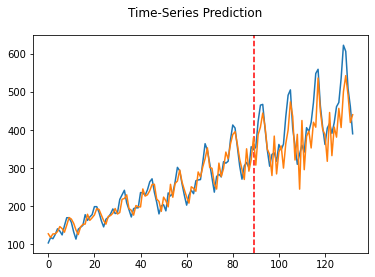

In [8]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

## Testing 5000 epochs

In [9]:
num_epochs = 5000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

In [10]:
criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.28095
Epoch: 100, loss: 0.00558
Epoch: 200, loss: 0.00349
Epoch: 300, loss: 0.00323
Epoch: 400, loss: 0.00300
Epoch: 500, loss: 0.00277
Epoch: 600, loss: 0.00256
Epoch: 700, loss: 0.00237
Epoch: 800, loss: 0.00221
Epoch: 900, loss: 0.00208
Epoch: 1000, loss: 0.00200
Epoch: 1100, loss: 0.00194
Epoch: 1200, loss: 0.00191
Epoch: 1300, loss: 0.00189
Epoch: 1400, loss: 0.00187
Epoch: 1500, loss: 0.00185
Epoch: 1600, loss: 0.00183
Epoch: 1700, loss: 0.00180
Epoch: 1800, loss: 0.00178
Epoch: 1900, loss: 0.00175
Epoch: 2000, loss: 0.00174
Epoch: 2100, loss: 0.00173
Epoch: 2200, loss: 0.00172
Epoch: 2300, loss: 0.00171
Epoch: 2400, loss: 0.00170
Epoch: 2500, loss: 0.00170
Epoch: 2600, loss: 0.00169
Epoch: 2700, loss: 0.00169
Epoch: 2800, loss: 0.00168
Epoch: 2900, loss: 0.00167
Epoch: 3000, loss: 0.00167
Epoch: 3100, loss: 0.00166
Epoch: 3200, loss: 0.00165
Epoch: 3300, loss: 0.00164
Epoch: 3400, loss: 0.00164
Epoch: 3500, loss: 0.00163
Epoch: 3600, loss: 0.00163
Epoch: 3700, 

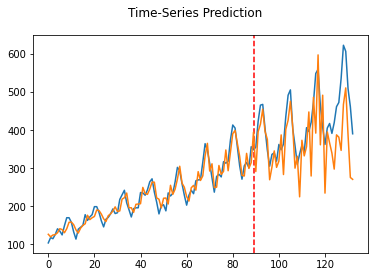

In [11]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [12]:
'''
***Explain Rerun*** your model with 5000 epochs. Do you notice something strange? If yes, provide an explanation.

Yes, something strange does occur. The predictions do not match the as well anymore and tend to get worse.
I think this could possibly be due to overfitting. Or perhaps it is trying to extrapolate too far outside the dataset.
'''

'\n***Explain Rerun*** your model with 5000 epochs. Do you notice something strange? If yes, provide an explanation.\n\nYes, something strange does occur. The predictions do not match the as well anymore and tend to get worse.\nI think this could possibly be due to overfitting. Or perhaps it is trying to extrapolate too far outside the dataset.\n'

## MSE Calculation

In [13]:
'''
Implement MSE calculation for the test data

'''
import math
def MSE(x, y):
  mse = ((y - x)**2) / len(x)
  return mse


In [14]:
mse_values = MSE(dataY_plot, data_predict)
output = [sum(x) for x in mse_values]
total_mse = sum(output)
print(total_mse)

2487.287261470976


## 9 Test parameters
seq_length = [3, 5, 10]
hidden_size = [1, 2, 4]
### All 9 plots and conclusions in pdf.

In [15]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 1
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

In [16]:
criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.60166
Epoch: 100, loss: 0.01290
Epoch: 200, loss: 0.00912
Epoch: 300, loss: 0.00494
Epoch: 400, loss: 0.00289
Epoch: 500, loss: 0.00263
Epoch: 600, loss: 0.00254
Epoch: 700, loss: 0.00247
Epoch: 800, loss: 0.00241
Epoch: 900, loss: 0.00235
Epoch: 1000, loss: 0.00230
Epoch: 1100, loss: 0.00224
Epoch: 1200, loss: 0.00217
Epoch: 1300, loss: 0.00211
Epoch: 1400, loss: 0.00206
Epoch: 1500, loss: 0.00201
Epoch: 1600, loss: 0.00197
Epoch: 1700, loss: 0.00193
Epoch: 1800, loss: 0.00190
Epoch: 1900, loss: 0.00187


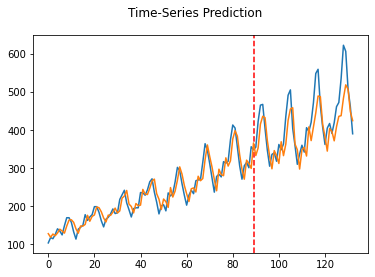

In [17]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [18]:
mse_values = MSE(dataY_plot, data_predict)
output = [sum(x) for x in mse_values]
total_mse = sum(output)
print(total_mse)

1170.3983939776663


In [19]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

In [20]:
criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.09352
Epoch: 100, loss: 0.00676
Epoch: 200, loss: 0.00260
Epoch: 300, loss: 0.00213
Epoch: 400, loss: 0.00188
Epoch: 500, loss: 0.00178
Epoch: 600, loss: 0.00176
Epoch: 700, loss: 0.00175
Epoch: 800, loss: 0.00174
Epoch: 900, loss: 0.00174
Epoch: 1000, loss: 0.00173
Epoch: 1100, loss: 0.00172
Epoch: 1200, loss: 0.00171
Epoch: 1300, loss: 0.00170
Epoch: 1400, loss: 0.00169
Epoch: 1500, loss: 0.00168
Epoch: 1600, loss: 0.00167
Epoch: 1700, loss: 0.00166
Epoch: 1800, loss: 0.00166
Epoch: 1900, loss: 0.00165


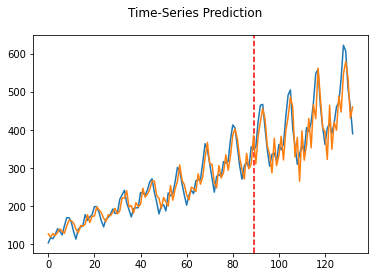

In [21]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [22]:
mse_values = MSE(dataY_plot, data_predict)
output = [sum(x) for x in mse_values]
total_mse = sum(output)
print(total_mse)

1017.5501351940911


In [23]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 4
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

In [24]:
criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.26944
Epoch: 100, loss: 0.00498
Epoch: 200, loss: 0.00313
Epoch: 300, loss: 0.00297
Epoch: 400, loss: 0.00279
Epoch: 500, loss: 0.00261
Epoch: 600, loss: 0.00241
Epoch: 700, loss: 0.00220
Epoch: 800, loss: 0.00198
Epoch: 900, loss: 0.00178
Epoch: 1000, loss: 0.00162
Epoch: 1100, loss: 0.00155
Epoch: 1200, loss: 0.00165
Epoch: 1300, loss: 0.00150
Epoch: 1400, loss: 0.00146
Epoch: 1500, loss: 0.00146
Epoch: 1600, loss: 0.00144
Epoch: 1700, loss: 0.00141
Epoch: 1800, loss: 0.00142
Epoch: 1900, loss: 0.00139


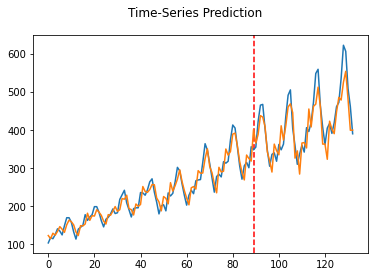

In [25]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [26]:
mse_values = MSE(dataY_plot, data_predict)
output = [sum(x) for x in mse_values]
total_mse = sum(output)
print(total_mse)

771.9197527600918
